<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Mohammad Javad Maheronnaghsh
### Student Number : 99105691
### Colab Link: https://colab.research.google.com/drive/16-z-jnQnAgBKSVNM45_ErmPeu6eQAiwL?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [1]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from random import choices
import math

## P1: Explore the Dataset

In [2]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-06 08:10:36--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-06 08:10:36--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc556457e2f78e50fbb64adfaf1.dl.dropboxusercontent.com/cd/0/get/B9e0gHmH-2jN4ejUlX8Hko4Ko6Pcou10ysSk-3SXkaS1rmzmdqOHSvLN2OC4w8BvJWC2p-sqR9XJgix-aDgVwKU5Ab0y8tvzrC_fwKsGh9VS2dIbT4r6RS0M48VGOtFHHYLVybQrrSffYKcmXyKZBFPHfMn3Jr5ipfJSPRhhYiEgAM_lYa7RPW_8Z3asl0EyvJU/file?dl=1# [following]
--2023-06-06 08:10:36--  https://ucc556457e2f78e50fbb64adfaf1.dl.dropboxusercontent.com/cd/0/get/B9e0gHmH-2jN4ejUlX8Hko4Ko6Pcou10ysSk

Load the dataset as a dataframe

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [5]:
np.any(df.isnull()) # There is no null value -> there is no need to remove anything

False

Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

<Axes: >

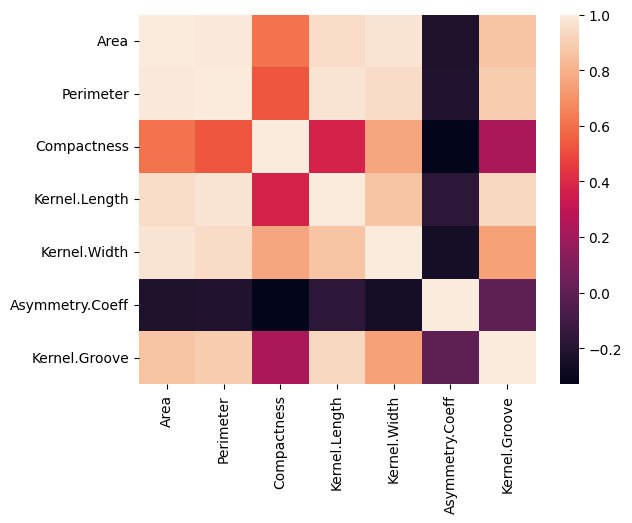

In [6]:
df_features = df.drop('Type', axis = 1)
sns.heatmap(df_features.corr())

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [7]:
corr_matrix = df_features.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# drop highly correlated features
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-7-4d8f9c658046>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [8]:
df

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.8710,2.221,5.220,1
1,14.88,0.8811,1.018,4.956,1
2,14.29,0.9050,2.699,4.825,1
3,13.84,0.8955,2.259,4.805,1
4,16.14,0.9034,1.355,5.175,1
...,...,...,...,...,...
194,12.19,0.8783,3.631,4.870,3
195,11.23,0.8511,4.325,5.003,3
196,13.20,0.8883,8.315,5.056,3
197,11.84,0.8521,3.598,5.044,3


Check for imbalance between classes **(P1-4: 3 points)**

In [9]:
print(len(df[df.Type == 1]))
print(len(df[df.Type == 2]))
print(len(df[df.Type == 3]))
# There is no significant imbalance between classes

66
68
65


## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [10]:
df_features = df.drop('Type', axis = 1)
df_target = df['Type']
x_np = df_features.to_numpy()
y_np = df_target.to_numpy()

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [12]:
class DecisionTree:
     
    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:
        
        criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.criterion = criterion
        self.max_depth = max_depth
    
    def fit(self, X, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        # Convert inputs to array if they are not already
        X = np.asarray(X)
        y = np.asarray(y)
        
        # Recursively build the tree
        self.tree_ = self._build_tree(X, y, depth=0)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        X = np.asarray(X)
        y = [self._traverse_tree(x, self.tree_) for x in X]
        
        return np.asarray(y)
    
    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if (self.max_depth is not None and depth >= self.max_depth) or len(np.unique(y)) == 1:
            leaf_value = self._get_leaf_value(y)
            return {'is_leaf': True, 'class': leaf_value}
        
        feature_idxs = np.random.choice(n_features, size=int(np.sqrt(n_features)), replace=False)
        best_feature, best_split = self._get_best_split(X, y, feature_idxs)
        
        if best_split['impurity'] == 0:
            leaf_value = self._get_leaf_value(y)
            return {'is_leaf': True, 'class': leaf_value}
        
        left_idxs = X[:, best_feature] <= best_split['value']
        right_idxs = X[:, best_feature] > best_split['value']
        left_tree = self._build_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_tree = self._build_tree(X[right_idxs], y[right_idxs], depth + 1)
        
        return {'is_leaf': False, 'feature_idx': best_feature, 'split': best_split, 'left': left_tree, 'right': right_tree}
    
    def _get_best_split(self, X, y, feature_idxs):
        best_feature = None
        best_split = {'feature_idx': -1, 'value': -1, 'impurity': 0}
        best_impurity = float('inf')
        
        for feature_idx in feature_idxs:
            feature_values = np.unique(X[:, feature_idx])
            for value in feature_values:
                left_idxs = X[:, feature_idx] <= value
                right_idxs = X[:, feature_idx] > value
                left_y = y[left_idxs]
                right_y = y[right_idxs]
                
                if self.criterion == 'entropy':
                    left_impurity = self._entropy(left_y)
                    right_impurity = self._entropy(right_y)
                    impurity = (len(left_y) / len(y)) * left_impurity + (len(right_y) / len(y)) * right_impurity
                else:
                    left_impurity = self._gini_impurity(left_y)
                    right_impurity = self._gini_impurity(right_y)
                    impurity = (len(left_y) / len(y)) * left_impurity + (len(right_y) / len(y)) * right_impurity
                
                if impurity < best_impurity:
                    best_feature = feature_idx
                    best_split = {'feature_idx': feature_idx, 'value': value, 'impurity': impurity}
                    best_impurity = impurity
        
        return best_feature, best_split
    
    def _traverse_tree(self, x, tree):
        if tree['is_leaf']:
            return tree['class']
        else:
            if x[tree['feature_idx']] <= tree['split']['value']:
                return self._traverse_tree(x, tree['left'])
            else:
                return self._traverse_tree(x, tree['right'])
    
    def _get_leaf_value(self, y):
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]
    
    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        entropy = -np.sum(probs * np.log2(probs))
        return entropy
    
    def _gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        impurity = 1 - np.sum(probs ** 2)
        return impurity

Define two decision trees with two different criteria **(P3-2: 3 points)**

In [13]:
decision_tree_entropy = DecisionTree(criterion = 'entropy')
decision_tree_gini = DecisionTree(criterion = 'gini')

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [14]:
decision_tree_entropy.fit(x_train, y_train)
decision_tree_gini.fit(x_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [15]:
preds_entropy = decision_tree_entropy.predict(x_test)
preds_gini = decision_tree_gini.predict(x_test)

print(np.sum((preds_entropy == y_test)) / len(y_test))
print(np.sum((preds_gini == y_test)) / len(y_test))


0.925
0.775


Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [16]:
decision_tree_entropy = DecisionTree(criterion = 'entropy', max_depth = 5)
decision_tree_gini = DecisionTree(criterion = 'gini', max_depth = 5)


decision_tree_entropy.fit(x_train, y_train)
decision_tree_gini.fit(x_train, y_train)

preds_entropy = decision_tree_entropy.predict(x_test)
preds_gini = decision_tree_gini.predict(x_test)

print(np.sum((preds_entropy == y_test)) / len(y_test))
print(np.sum((preds_gini == y_test)) / len(y_test))

0.95
0.75


Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

In [17]:
# generally, setting max depth is helpful in increasing accuracy
'''
The "max_depth" parameter limits the maximum depth of the decision tree,
 which can prevent overfitting to the training data.

Without using the "max_depth" parameter, the decision tree can continue
 to split the data until each leaf node only contains one sample. 
 This can result in a very complex and overfitted model, which may
  not perform well on new, unseen data. 

On the other hand, by limiting the maximum depth of the decision tree,
 we can prevent it from becoming too complex and overfitting the training data.
  This can improve the generalization performance of the model on new data.
'''

'\nThe "max_depth" parameter limits the maximum depth of the decision tree,\n which can prevent overfitting to the training data.\n\nWithout using the "max_depth" parameter, the decision tree can continue\n to split the data until each leaf node only contains one sample. \n This can result in a very complex and overfitted model, which may\n  not perform well on new, unseen data. \n\nOn the other hand, by limiting the maximum depth of the decision tree,\n we can prevent it from becoming too complex and overfitting the training data.\n  This can improve the generalization performance of the model on new data.\n'

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [18]:
class BaggingDecisionTree:
     
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:
        
        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """
        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers_ = []
        
    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """
        X = np.asarray(X)
        y = np.asarray(y)
        
        n_samples = X.shape[0]
        bootstraped_samples_num = int(n_samples * 0.8)
        
        for i in range(self.bootstraped_training_num):
            bootstrap_idxs = np.random.choice(n_samples, size=bootstraped_samples_num, replace=True)
            X_bootstrap = X[bootstrap_idxs]
            y_bootstrap = y[bootstrap_idxs]
            
            clf = DecisionTree()
            clf.fit(X_bootstrap, y_bootstrap)
            self.classifiers_.append(clf)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        X = np.asarray(X)
        
        y_votes = np.zeros((X.shape[0], len(self.classifiers_)))
        for i, clf in enumerate(self.classifiers_):
            y_votes[:, i] = clf.predict(X)

        y_votes = y_votes.astype(int)
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            y_pred[i] = np.bincount(y_votes[i]).argmax()
        
        return y_pred

Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [19]:
bagging1 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=50)
bagging1.fit(x_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [20]:
bagging2 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=7)
bagging2.fit(x_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [21]:
preds_bag_1 = bagging1.predict(x_test)
preds_bag_2 = bagging2.predict(x_test)


print(np.sum(preds_bag_1 == y_test) / len(y_test))
print(np.sum(preds_bag_2 == y_test) / len(y_test))

0.85
0.925


### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [63]:
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
     
    def __init__(self, weak_classifiers_count=50):
        """
        Parameters:
        weak_classifiers_count -- The number of weak classifiers we are gonna have
        """
        self.weak_classifiers_n = weak_classifiers_count
    
    def _compute_error(self, y_true, y_pred, w):
        errors = []
        for k in range(self.class_count):
            check = (y_true == k+1)
            errors.append(np.sum(w[check] * (y_true[check] != y_pred[check])) / np.sum(w[check]))
        return np.mean(errors)
    
    def _compute_alpha(self, error):
        return np.log((1 - error) / (error + 1e-10)) + np.log(self.class_count-1)

    def _give_prediction(self, X, y, sample_weight):
      # Train
      classifier = DecisionTreeClassifier(max_depth=1)
      classifier.fit(X, y, sample_weight=sample_weight)

      y_pred = classifier.predict(X)
      return classifier, y_pred

    def _do_fit_related_things(self, errors, X, y, weights):
       for i in range(self.weak_classifiers_n):
            classifier, y_pred = self._give_prediction(X, y, sample_weight=weights)
            
            errors[i] = self._compute_error(y, y_pred, weights)
            self._alphas[i] = self._compute_alpha(errors[i])
            
            weights *= np.exp(self._alphas[i] * (y != y_pred))
            weights /= np.sum(weights)
            
            self._classifiers.append(classifier)

    def fit(self, X, y):
        """
        Fit the AdaBoost on training data. take DecisionTree with max_depth of 1 as your weak classifier.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        
        """
        weights = np.full(y.shape[0], 1 / y.shape[0])
        errors = np.empty(self.weak_classifiers_n)

        self.class_count = len(np.unique(y))
        self._classifiers = []
        self._alphas = np.empty(self.weak_classifiers_n)
        self._do_fit_related_things(errors, X, y, weights)
        
       
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of self.predictors_num classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        probs = np.zeros((X.shape[0], self.class_count))
        for alpha, classifier in zip(self._alphas, self._classifiers):
            predictions = classifier.predict(X)
            for k in range(self.class_count):
                probs[:, k] += alpha * (predictions == k+1)
        return np.argmax(probs, axis=1) + 1

Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [64]:
adaboost = AdaBoost()
adaboost.fit(x_train, y_train)

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [65]:
preds = adaboost.predict(x_test)

In [66]:
print(np.sum(preds == y_test) / len(y_test))

0.925
